<a href="https://colab.research.google.com/github/fargonemaciel/infnet-machine-learning-codes/blob/main/projeto_de_bloco_GRLCDDR1C1_N2_L2_PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preprocessamento

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
wine = pd.read_csv('https://raw.githubusercontent.com/tciodaro/eng_ml/refs/heads/main/data/dataset_vinhos.csv', sep=';')

In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,target_label,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,baixa qualidade,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,baixa qualidade,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,baixa qualidade,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,alta qualidade,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,baixa qualidade,red


In [14]:
wine.shape

(5320, 14)

In [12]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,0.626316
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.483827
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [16]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target', 'target_label', 'type'],
      dtype='object')

In [17]:
feature_list=[
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'target'
]

In [20]:
wine[feature_list].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.071957
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.269907
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.087051
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.047778
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.187385
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.046755
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.049383
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.287178
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.036104
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.035562


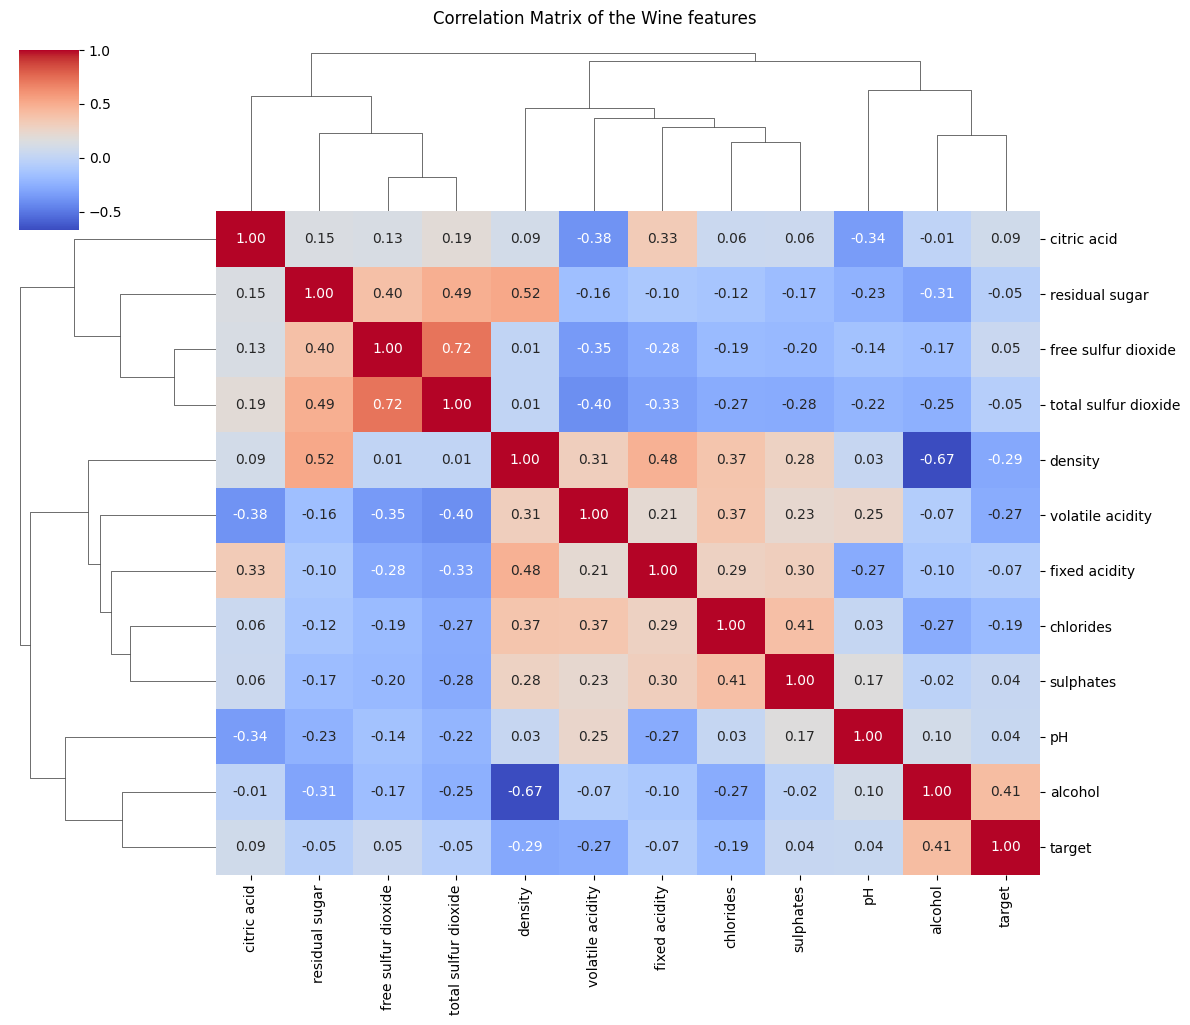

In [37]:
correlation_matrix = wine[feature_list].corr()

sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', figsize=(12, 10))
plt.suptitle('Correlation Matrix of the Wine features', y=1.02)
plt.show()

In [ ]:
"""
Variáveis mais correlacionadas entre si:
- citric acid com volatile acidity e ph;
- residual sugar com density, total sulfur dioxide e free sulfur dioxide;
- free sulfur dioxide com total sulfur dioxide;
- density com fixed acidity e alcohol;
etc
"""

In [ ]:
wine_melted = wine[feature_list].melt(var_name='features', value_name='value')

plt.figure(figsize=(15, 8))
sns.boxplot(x='features', y='value', data=wine_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Wine Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

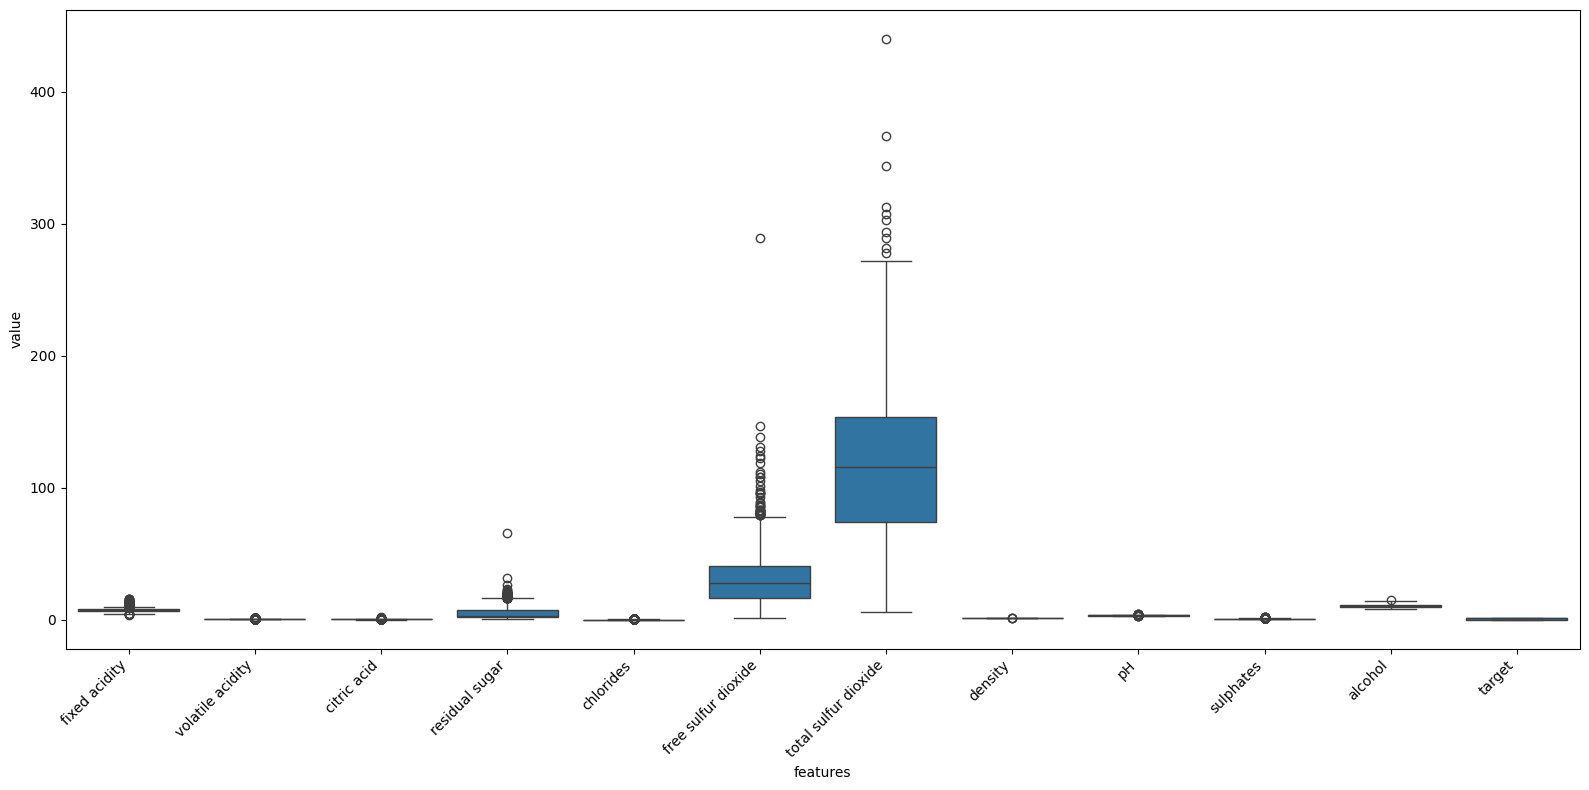

In [47]:
wine_melted = wine[feature_list].melt(var_name='features', value_name='value')

plt.figure(figsize=(16, 8))

sns.boxplot(x='features', y='value', data=wine_melted)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

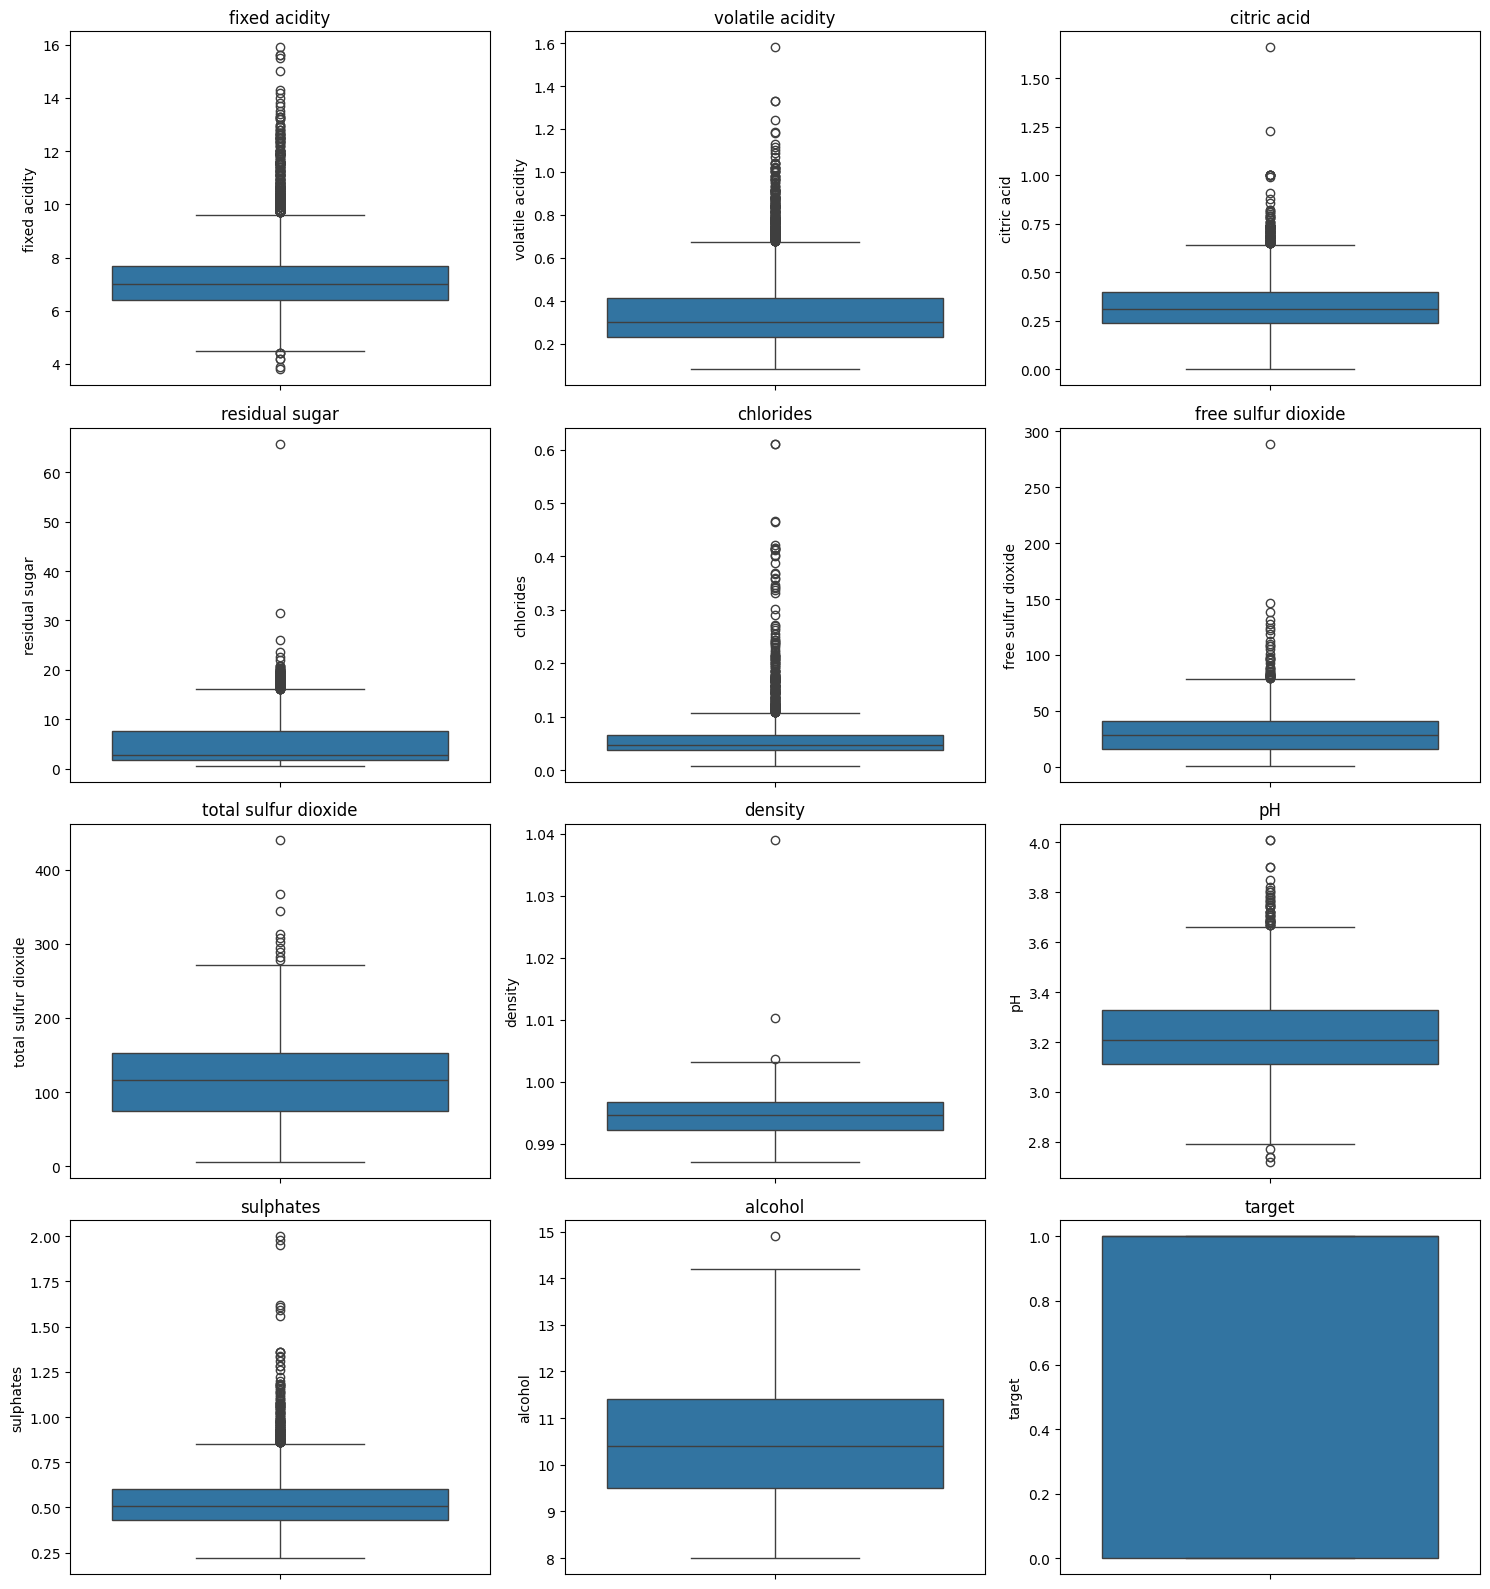

In [54]:
# O erro `KeyError: 'f'` ocorreu porque a variável `features` (que foi atribuída de `feature_list`)
# era uma string (por exemplo, 'fixed acidity') em vez de uma lista de nomes de colunas.
# Ao iterar sobre uma string, `feature` recebe caracteres individuais como 'f', 'i', 'x', etc.,
# que não são nomes de colunas válidos no DataFrame `wine`.

# Para corrigir isso, vamos redefinir `features` explicitamente como a lista de nomes de colunas pretendida.
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'target'
]

n = len(features)
cols = 3
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

axes = axes.flatten()

for i, feature in enumerate(features):
  sns.boxplot(y=wine[feature], ax=axes[i])
  axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()